# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,make_scorer
from sklearn.metrics import precision_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Upload dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Toddler Autism dataset July 2018.csv to Toddler Autism dataset July 2018.csv


# Take a look 

In [ ]:
df=pd.read_csv("Toddler Autism dataset July 2018.csv")
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [ ]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173
std,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000


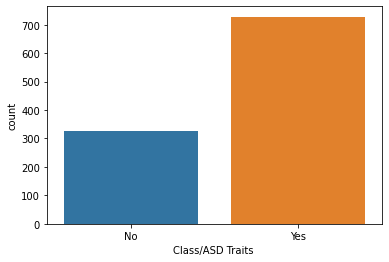

In [ ]:
sns.countplot(data=df,x='Class/ASD Traits ')


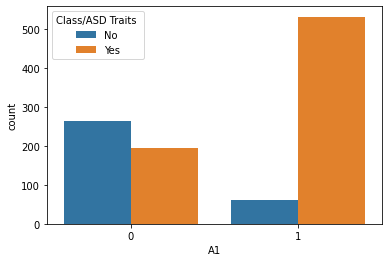

In [ ]:
sns.countplot(data=df,x="A1",hue='Class/ASD Traits ')

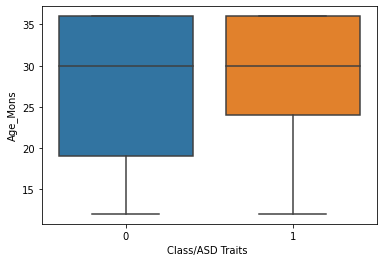

In [ ]:
sns.boxplot(data=df,y='Age_Mons',x='Class/ASD Traits ')

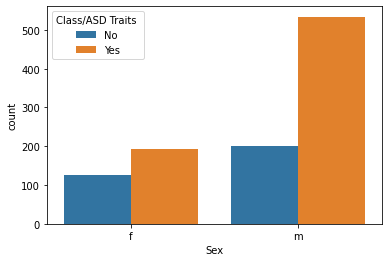

In [ ]:
sns.countplot(data=df,x="Sex",hue='Class/ASD Traits ')

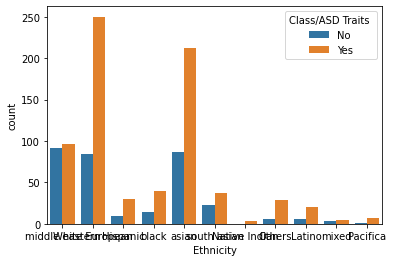

In [ ]:
sns.countplot(data=df,x="Ethnicity",hue='Class/ASD Traits ')

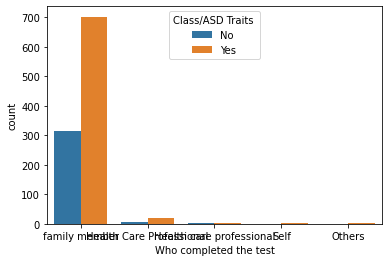

In [ ]:
sns.countplot(data=df,x="Who completed the test",hue='Class/ASD Traits ')

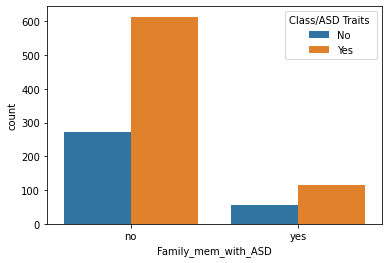

In [ ]:
sns.countplot(data=df,x="Family_mem_with_ASD",hue='Class/ASD Traits ')

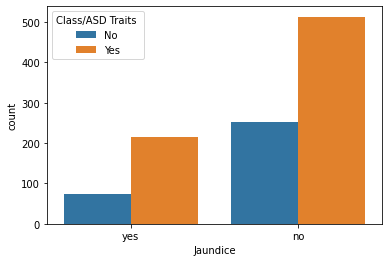

In [ ]:
sns.countplot(data=df,x="Jaundice",hue='Class/ASD Traits ')

# Preprocessing

In [ ]:
df.drop(columns=['Qchat-10-Score','Case_No'],axis=0,inplace=True)

In [ ]:
df['Class/ASD Traits ']=df['Class/ASD Traits '].replace({'Yes':1,'No':0})

In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
data=df.copy()

In [ ]:
X = data.loc[:,:'Class/ASD Traits ']
y = data.loc[:,'Class/ASD Traits ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True)


# Modeling 

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# StratifiedKFold/catbost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
categorical_features_indices=[0]
clf = CatBoostClassifier(learning_rate=0.055, 
                          n_estimators=1000, 
                          subsample=0.075, 
                          max_depth=3, 
                          verbose=100,
                          l2_leaf_reg = 7,
                          eval_metric='F1')

kf = StratifiedKFold(n_splits=7,shuffle=True,random_state=12345)
f1 = []

for fold,(t_id,v_id) in enumerate(kf.split(X_train,y_train)):
    tx = X_train.iloc[t_id]; ty = y_train.iloc[t_id]
    vx = X_train.iloc[v_id]; vy = y_train.iloc[v_id]
    clf.fit(tx,ty)        
    val_y = clf.predict(vx)
    
    F1_score = f1_score(vy, val_y)
    f1.append(F1_score)
    print(f"fold {fold} f1 {F1_score}")
    print(confusion_matrix(val_y, vy))

print(f"Mean f1 score {np.mean(f1)}")

0:	learn: 1.0000000	total: 739us	remaining: 739ms
100:	learn: 1.0000000	total: 53.6ms	remaining: 477ms
200:	learn: 1.0000000	total: 103ms	remaining: 408ms
300:	learn: 1.0000000	total: 152ms	remaining: 352ms
400:	learn: 1.0000000	total: 205ms	remaining: 306ms
500:	learn: 1.0000000	total: 259ms	remaining: 258ms
600:	learn: 1.0000000	total: 305ms	remaining: 203ms
700:	learn: 1.0000000	total: 353ms	remaining: 150ms
800:	learn: 1.0000000	total: 404ms	remaining: 100ms
900:	learn: 1.0000000	total: 452ms	remaining: 49.6ms
999:	learn: 1.0000000	total: 501ms	remaining: 0us
fold 0 f1 1.0
[[57  0]
 [ 0 57]]
0:	learn: 1.0000000	total: 884us	remaining: 884ms
100:	learn: 1.0000000	total: 58.1ms	remaining: 517ms
200:	learn: 1.0000000	total: 110ms	remaining: 436ms
300:	learn: 1.0000000	total: 163ms	remaining: 377ms
400:	learn: 1.0000000	total: 212ms	remaining: 317ms
500:	learn: 1.0000000	total: 263ms	remaining: 262ms
600:	learn: 1.0000000	total: 311ms	remaining: 207ms
700:	learn: 1.0000000	total: 359ms

# Randomoversamplig

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,shuffle=True)

# summarize class distribution
print("Before OVERsampling: ", Counter(y_train))

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

# summarize class distribution
print("After OVERsampling: ", Counter(y_train_over))

Before OVERsampling:  Counter({1: 497, 0: 240})
After OVERsampling:  Counter({0: 497, 1: 497})


# Somte

In [ ]:
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 497, 1: 497})


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
categorical_features_indices=[0]
clf = CatBoostClassifier(learning_rate=0.055, 
                          n_estimators=1000, 
                          subsample=0.075, 
                          max_depth=3, 
                          verbose=100,
                          l2_leaf_reg = 7,
                          eval_metric='F1')

kf = StratifiedKFold(n_splits=7,shuffle=True,random_state=12345)
f1 = []

for fold,(t_id,v_id) in enumerate(kf.split(X_train,y_train)):
    tx = X_train_SMOTE.iloc[t_id]; ty = y_train_SMOTE.iloc[t_id]
    vx = X_train_SMOTE.iloc[v_id]; vy = y_train_SMOTE.iloc[v_id]
    clf.fit(tx,ty)        
    val_y = clf.predict(vx)
    
    F1_score = f1_score(vy, val_y)
    f1.append(F1_score)
    print(f"fold {fold} f1 {F1_score}")
    print(confusion_matrix(val_y, vy))

print(f"Mean f1 score {np.mean(f1)}")
   

0:	learn: 1.0000000	total: 742us	remaining: 741ms
100:	learn: 1.0000000	total: 62.5ms	remaining: 556ms
200:	learn: 1.0000000	total: 113ms	remaining: 449ms
300:	learn: 1.0000000	total: 163ms	remaining: 380ms
400:	learn: 1.0000000	total: 216ms	remaining: 323ms
500:	learn: 1.0000000	total: 266ms	remaining: 265ms
600:	learn: 1.0000000	total: 319ms	remaining: 211ms
700:	learn: 1.0000000	total: 367ms	remaining: 157ms
800:	learn: 1.0000000	total: 419ms	remaining: 104ms
900:	learn: 1.0000000	total: 467ms	remaining: 51.3ms
999:	learn: 1.0000000	total: 517ms	remaining: 0us
fold 0 f1 1.0
[[46  0]
 [ 0 68]]
0:	learn: 1.0000000	total: 749us	remaining: 749ms
100:	learn: 1.0000000	total: 55.5ms	remaining: 494ms
200:	learn: 1.0000000	total: 104ms	remaining: 412ms
300:	learn: 1.0000000	total: 151ms	remaining: 351ms
400:	learn: 1.0000000	total: 204ms	remaining: 305ms
500:	learn: 1.0000000	total: 256ms	remaining: 255ms
600:	learn: 1.0000000	total: 308ms	remaining: 204ms
700:	learn: 1.0000000	total: 357ms

#Testing

In [ ]:
clf_y = clf.predict(X_test)
F1_score = f1_score(y_test, clf_y)

print(confusion_matrix(clf_y, y_test))
print(f1_score(y_test,clf_y))
print(precision_score(y_test, clf_y))
print(recall_score(y_test, clf_y) )

[[ 86   0]
 [  0 231]]
1.0
1.0
1.0
